# Lecture 8 - Multidimensional Arrays with Numpy

#### Announcements:
* Sign up to be a mentee in the CS department's peer mentorship program! More info and signup forms here: <https://cs.wwu.edu/cs-mentoring-program>
* Data Ethics 1 - download your data and poke at it. Due next Tuesday night.
* Lab 2 due tomorrow night!


Two more faculty candidate talks this week:
* Thu 1/26 Kritagya Upadhyay 4pm CF 105 - Research (blockchain applications, artificial intelligence, and cyber security)
* Fri 1/27 Kritagya Upadhyay 4pm CF 316 - Teaching

#### Goals:
* Know the basics of how to work with numpy arrays.
  * Creation (np.array, np.zeros)
  * data types (np.uint8, np.float32, ...)
  * dimensions (a.shape, a.ndim)
  * Elementwise operations (array/scalar, array/array)
  * Images and videos as ndarrays
  * Indexing, slicing, boolean indexing/masking
  * A few useful functions:
    * transpose, reshape
    * sum, mean, max, min; axis kwarg
  * Broadcasting (basic example)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

### The `numpy` package and `ndarray` type
The `numpy` package is largely focused on providing the `ndarray` type and related functionality; an `ndarray` is a **multi-dimensional array**.

Why is this interesting to us?
* Pandas is built on top of numpy, and inherits a lot of its concepts.

In [33]:
import pandas as pd
df = pd.DataFrame({"Count": range(10)})
df["Count"].to_numpy()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* Numpy allows us to do (fast) manipulations and math on arrays of numbers, including linear algebra operations that are central to regression, machine learning, and other important data analysis techniques.

### Array Creation
`np.array`, `np.zeros`, `np.ones`

In [42]:
a = np.array([1,2,3])
a

array([1, 2, 3])

In [44]:
b = np.zeros(8)
b

In [37]:
np.ones(4)

array([1., 1., 1., 1.])

In [38]:
np.ones(4)*4

array([4., 4., 4., 4.])

### Array Data Types
`a.dtype`; dtype kwarg to `array`, `zeros`, `ones`

Unlike DataFrames, ndarrays need to be all one type. Numpy builtin types include:
* `np.uint`(8, 16, 32, 64)
* `np.int`(8, 16, 32, 64)
* `np.float`(16, 32, 64)

You can use python's native types too - `bool`, `float` (same as `np.float64`), `int` (same as `int64`)...

In [48]:
np.array([1, 0, 0], dtype=np.float32).dtype

dtype('float32')

In [43]:
a.dtype

dtype('int64')

In [49]:
b.dtype

dtype('float64')

In [50]:
b.astype(np.float32)

array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Array Dimensions
`a.shape`, `a.ndim`

* In 2 dimensions, we think of the first as a row index and the second as a column index (this is matrix-style indexing)

In [51]:
a.shape

(3,)

In [53]:
a2d = np.ones((3, 4))
a2d

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [54]:
a2d.shape

(3, 4)

* Numpy arrays can have any number of dimensions!

In [56]:
a3d = np.ones((3,2,4))
a3d.shape

(3, 2, 4)

In [59]:
a3d.ndim

3

**Storage order:** last dimensions are most adjacent.

**Exercise:** Are 2D numpy arrays stored **row-major** or **column-major**?
![](https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L08/row_col_major.png)

In [60]:
b2d = np.array([[1,2,3], [4,5,6]])
b2d

array([[1, 2, 3],
       [4, 5, 6]])

In [61]:
b2d.flatten()

array([1, 2, 3, 4, 5, 6])

In [62]:
b3d = np.array([np.ones((2, 4))*i for i in range(3)])

### Transpose, Reshape
`a.T` (2d); `a.transpose(order)` (3d); `a.reshape(new_shape)`

In [63]:
 b2d

array([[1, 2, 3],
       [4, 5, 6]])

In [64]:
b2d.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [66]:
b2d.transpose((1, 0))

array([[1, 4],
       [2, 5],
       [3, 6]])

**Exercise**: `b3d` has shape `(2, 3, 4)`. What is `b3d.transpose((2,0,1)).shape`?

In [69]:
b3d_really = np.zeros((2,3,4))
b3d_really.transpose((2,0,1)).shape

(4, 2, 3)

In [68]:
b3d.shape

(3, 2, 4)

In [67]:
b3d.transpose((2,0,1)).shape

(4, 3, 2)

### Elementwise operations
Array/Scalar, Array/Array
* scale and shift b2d
* multiply b2d by itself

In [72]:
b2d * 2 + 1

array([[ 3,  5,  7],
       [ 9, 11, 13]])

In [73]:
b2d > 2

array([[False, False,  True],
       [ True,  True,  True]])

In [76]:
b2d

array([[1, 2, 3],
       [4, 5, 6]])

In [78]:
b2d * b2d

array([[ 1,  4,  9],
       [16, 25, 36]])

In [79]:
b2d * b3d

ValueError: ignored

### Multidimensional arrays as images

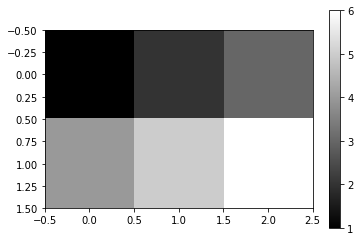

In [80]:
plt.imshow(b2d,cmap="gray")
plt.colorbar()

Color images are conventionally stored (row, column, channel), where channel is a dimension of size 3 containing red, green, and blue values.

In [82]:
b3d.shape

(3, 2, 4)

In [84]:
imcolor = b3d.reshape((2, 4, 3)) / b3d.max()
imcolor.shape

(2, 4, 3)

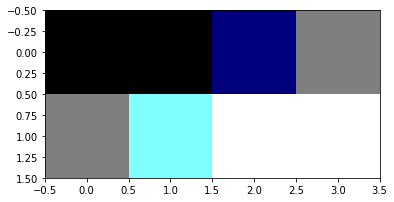

In [85]:
plt.imshow(imcolor)

Image Manipulation
* Load and display Beans
* What is the dtype? Min and max?
* Convert to float and normalize; display again


In [86]:
beans = imageio.imread("https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/data/beans_200.jpeg")

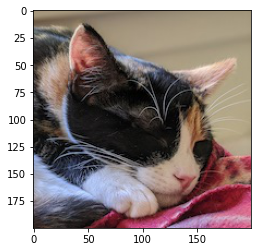

In [88]:
plt.imshow(beans)

In [89]:
beans.dtype

dtype('uint8')

In [90]:
beans.min()

0

In [95]:
beans.max()

1.0

In [92]:
beans = beans.astype(np.float32) / 255

In [93]:
beans.dtype

dtype('float32')

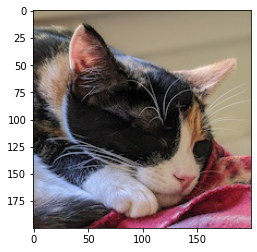

In [94]:
plt.imshow(beans)

### Indexing, Slicing, Masking/Boolean Indexing



* Index a single value
* Index a single (RGB) pixel
* Slice a single row or column of pixels
* Slice a 2d crop of the image
* Get and display a boolean mask

In [96]:
beans.shape

(200, 200, 3)

In [97]:
beans[0,0,0]

0.6392157

In [98]:
beans[0,0,:]

Array([0.6392157 , 0.5764706 , 0.47843137], dtype=float32)

In [100]:
beans[:,0,0].shape

(200,)

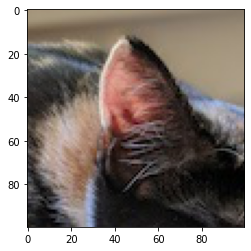

In [103]:
plt.imshow(beans[:100,:100,:])

### A note on printing out >2D arrays
Mortal minds like mine cannot comprehend the output when displaying an array with more than 2 dimensions:

In [107]:
imcolor

array([[[0. , 0. , 0. ],
        [0. , 0. , 0. ],
        [0. , 0. , 0.5],
        [0.5, 0.5, 0.5]],

       [[0.5, 0.5, 0.5],
        [0.5, 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ]]])

In [108]:
imcolor[:,:,1]

array([[0. , 0. , 0. , 0.5],
       [0.5, 1. , 1. , 1. ]])

My coping strategy is to **only** ever print out a slice that's 2D or less.

For example, if I slice the 0th (red) channel of `imcolor` and display that, it makes sense to me:

### Useful Methods
`a.sum`, `a.mean`; `axis` kwarg

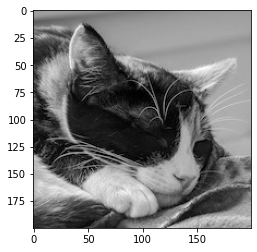

In [115]:
beans_gray = beans.mean(axis=2)
plt.imshow(beans_gray, cmap="gray")

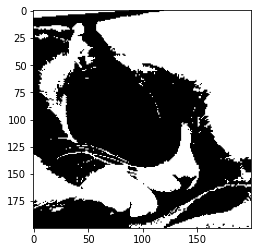

In [120]:
plt.imshow((beans_gray > 0.5), cmap="gray")

In [121]:
(beans_gray > 0.5).sum()

18884

### Broadcasting
Array-Array elementwise operations require the arrays to have the same shape (and number of dimensions).


**Exception**: if a corresponding dimension is 1 in one array, the values will be repeated ("broadcast") along that dimension.

In [ ]:
green_beans = beans[:,:,1] # the green channel of the beans image
plt.imshow(green_beans, cmap="gray")

Introduce a vertical "haze" gradient effect. In other words, make each row brighter by an amount that increases as you go down the image.

In [ ]:
fade = np.array(range(200)) / 200

If you have one array that matches except it's simply missing a dimension, you can add a singleton dimension:

In [ ]:
green_beans.shape

In [ ]:
beans.shape

In [ ]:
beans * green_beans

### Fancy Indexing and Masking

* Set to black all pixels where the average of R, G, and B is under a threshold